<a href="https://colab.research.google.com/github/bindukovvada/Appliances_Energy_Prediction/blob/main/Bindu_Applicances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Appliances Energy Prediction</b>

#<b>Aim:  Data-driven prediction of energy use of appliances</b>

#The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column.


# <b>Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters)</b>

#<b>About the data:

### <b>The columns in the given dataset are as follows:</b>
###<b>date</b> - time year-month-day hour:minute:second
###<b>Appliances</b> - energy use in Wh (Dependent variable)
###<b>lights</b> -  energy use of light fixtures in the house in Wh (Drop this column)
###<b>T1</b> - Temperature in kitchen area, in Celsius
###<b>T2</b> - Temperature in living room area, in Celsius
###<b>T3</b> - Temperature in laundry room area, in Celsius
###<b>T4</b> - Temperature in office room, in Celsius
###<b>T5</b> - Temperature in bathroom, in Celsius
###<b>T6</b> - Temperature outside the building (north side), in Celsius
###<b>T7</b> - Temperature in ironing room , in Celsius
###<b>T8</b> - Temperature in teenager room 2, in Celsius
###<b>T9</b>,Temperature in parents room, in Celsius
###<b>To</b>, Temperature outside (from Chievres weather station), in Celsius 
###<b>RH1</b> - Humidity in kitchen area, in % 
###<b>RH2</b> - Humidity in living room area, in %
###<b>RH3</b> - Humidity in laundry room area, in %  
###<b>RH4</b> - Humidity in office room, in %
###<b>RH5</b> - Humidity in bathroom, in % 
###<b>RH6</b> - Humidity outside the building (north side), in %
###<b>RH7</b> - Humidity in ironing room, in %  
###<b>RH8</b> - Humidity in teenager room 2</b>, in %
###<b>RH9</b>  - Humidity in parents room, in %
###<b>Pressure</b> (from Chievres weather station), in mm 
###<b>Hg RHout</b> - Humidity outside (from Chievres weather station), in %
###<b>Wind speed</b> (from Chievres weather station), in m/s
###<b>Visibility</b> (from Chievres weather station), in km
###<b>Tdewpoint</b> (from Chievres weather station), Â°C
###<b>rv1</b> - Random variable 1, nondimensional
###<b>rv2</b> - Random variable 2, nondimensional

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#Exploratory Data Analysis

In [ ]:
#Copying the dataset
energy = df

In [ ]:
#Finding the size of the dataset
energy.shape

(19735, 29)

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
energy.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [ ]:
#Viewing all the columns
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Finding Duplicate values
len(energy[energy.duplicated()])

0

No Duplicates found

In [ ]:
#Finding Null values
energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No Null values found

In [ ]:
energy['dependent'] = energy['Appliances']

In [ ]:
#Change dtype of 'date' column 
energy['date'] = pd.to_datetime(energy['date'])
energy['months'] = energy['date'].dt.month
energy['hour'] = energy['date'].dt.hour
energy['week'] = energy['date'].dt.week
energy['weekday'] = energy['date'].dt.weekday

In [ ]:
date = energy.groupby(energy.months)['Appliances'].sum().sort_values(ascending = True)
date

months
1    283510
5    362950
2    421550
4    427200
3    432800
Name: Appliances, dtype: int64

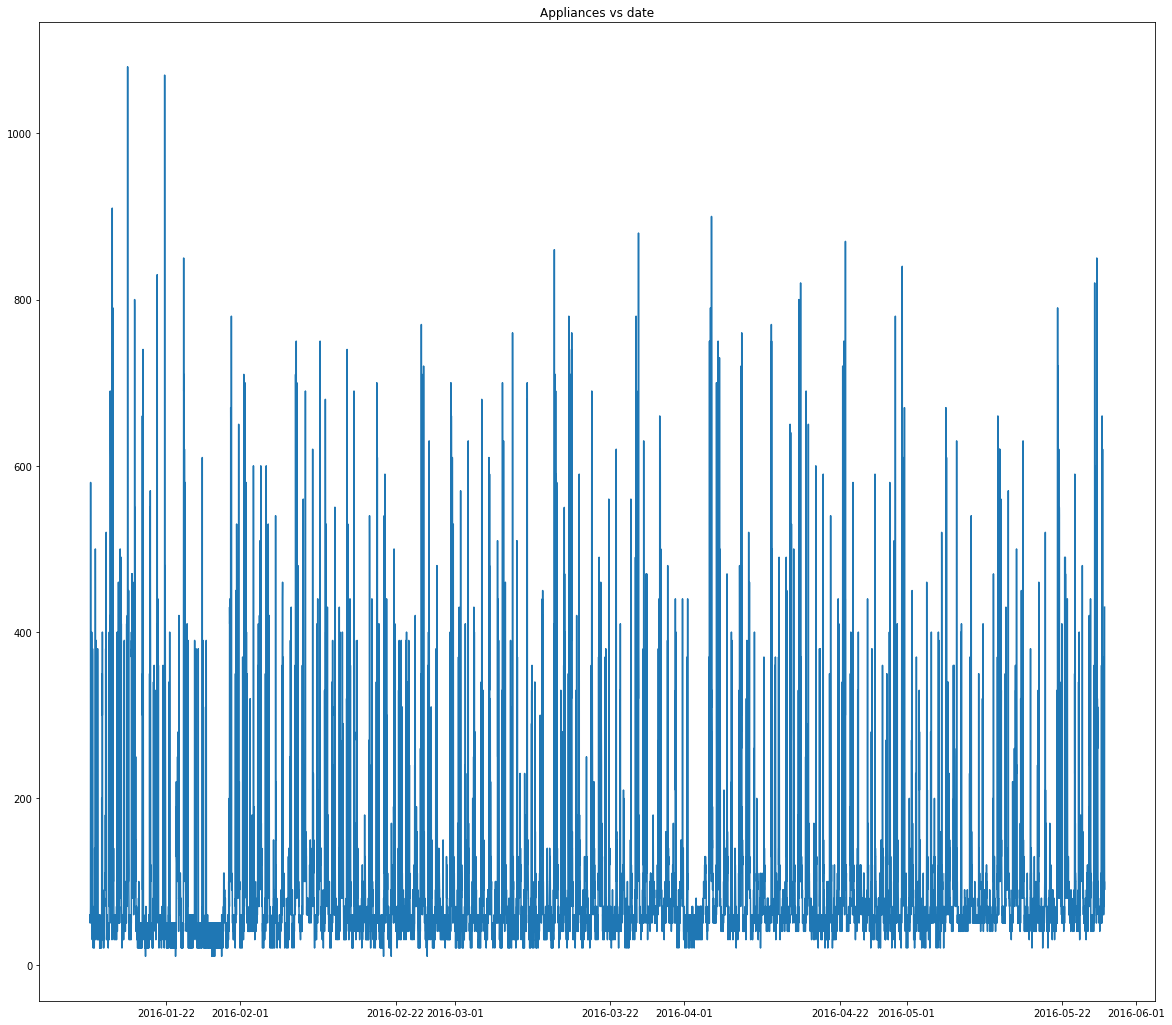

In [ ]:
#Find the graph between Appliances and the dates
plt.figure(figsize=(20,18))
plt.plot(energy['date'], energy['Appliances'])
plt.title('Appliances vs date')
plt.show()


We can see that appliances consuming more energy in the january month when compared to remainig months

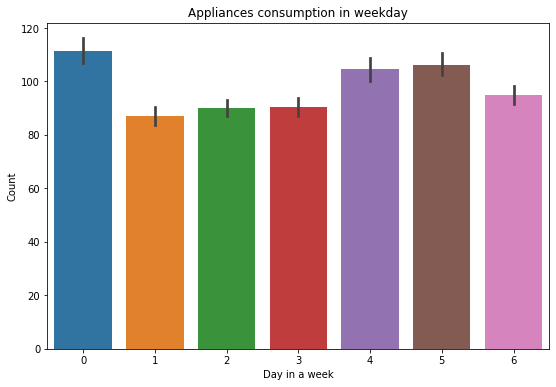

In [ ]:
fig = plt.figure(figsize=(9, 6))
a=sns.barplot(x =energy['weekday'], y=energy['Appliances'])
a.set_title('Appliances consumption in weekday')
a.set_xlabel("Day in a week") 
a.set_ylabel('Count')
plt.show()

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

In [ ]:
#drop the light column 
energy. drop('lights', axis=1, inplace=True)

In [ ]:
#Checking shape after dropping light column
energy.shape

(19735, 28)

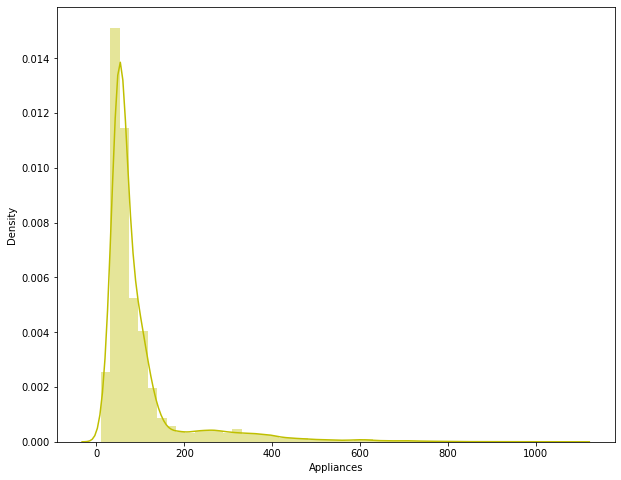

In [ ]:
#Checking distribution of Dependent varibale 'Appliances'
plt.figure(figsize = (10,8))
sns.distplot(energy['Appliances'], color = 'y')

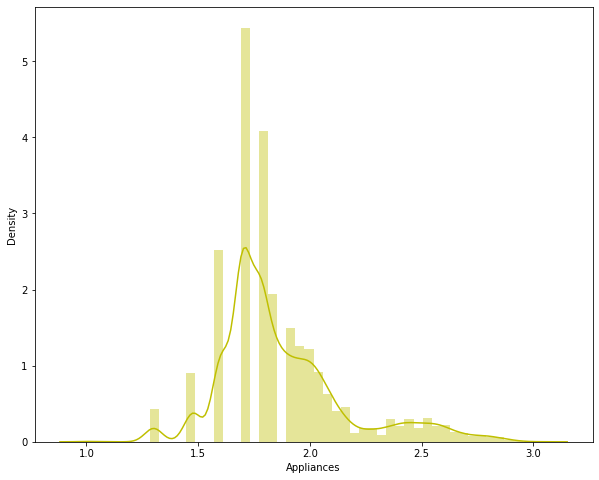

In [ ]:
#Apply log transformation to the dependent variable to get normally distributed
plt.figure(figsize = (10,8))
sns.distplot(np.log10(energy['Appliances']),color = 'y')

In [ ]:
numeric_features = energy.describe().columns

In [ ]:
numeric_features=numeric_features.drop('Appliances')

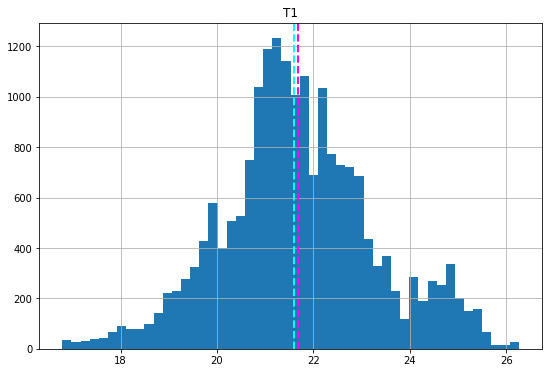

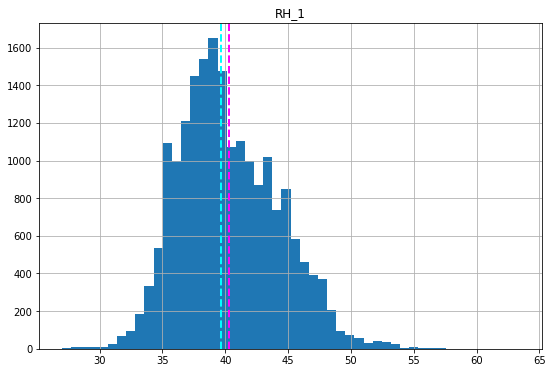

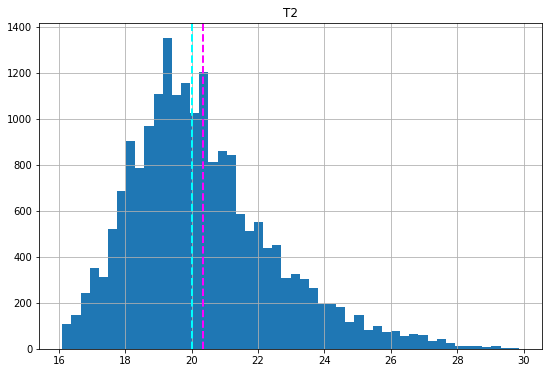

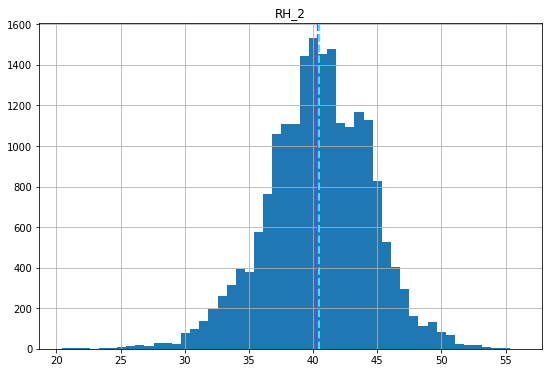

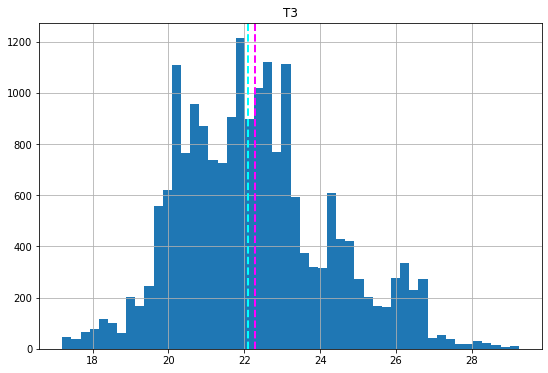

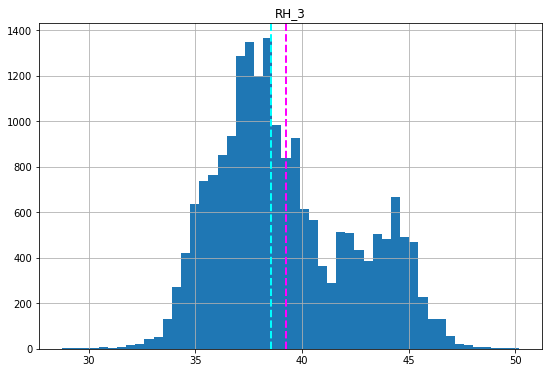

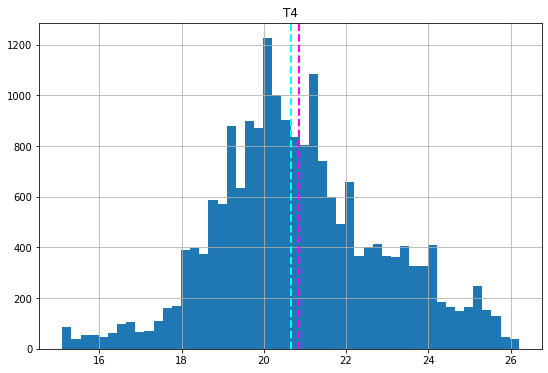

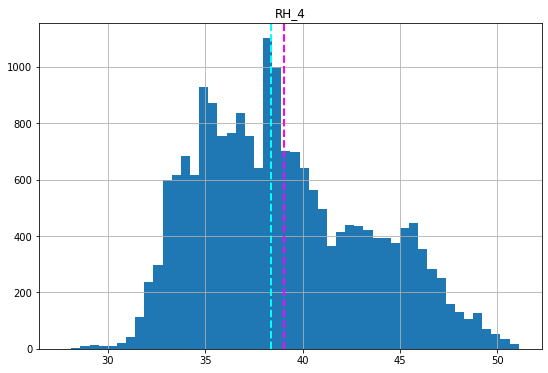

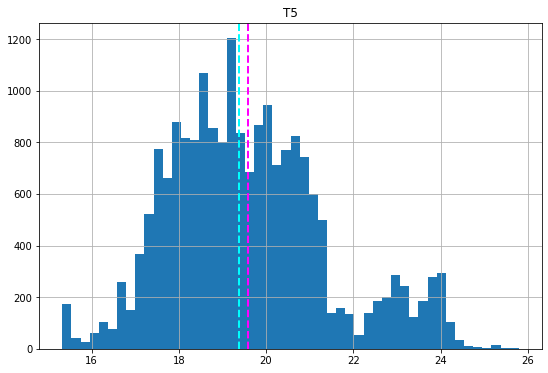

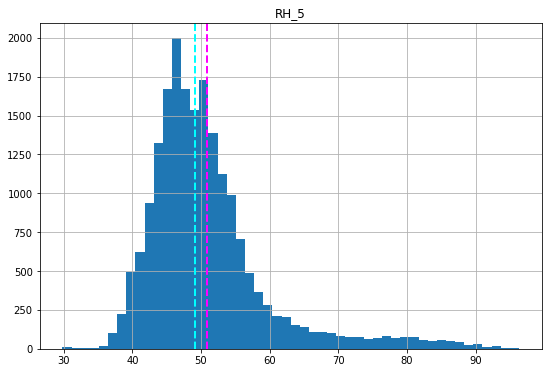

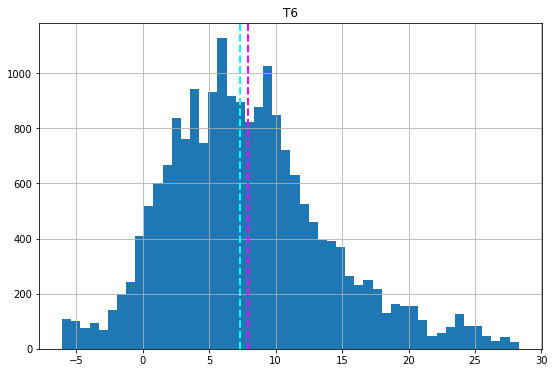

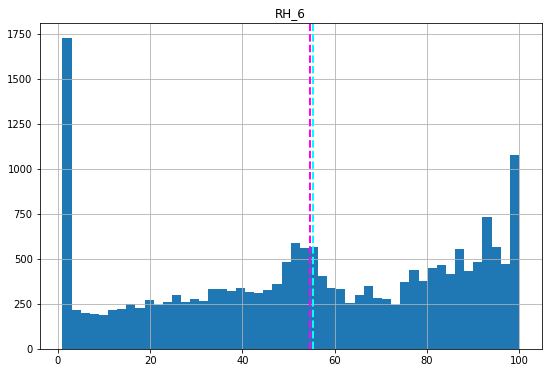

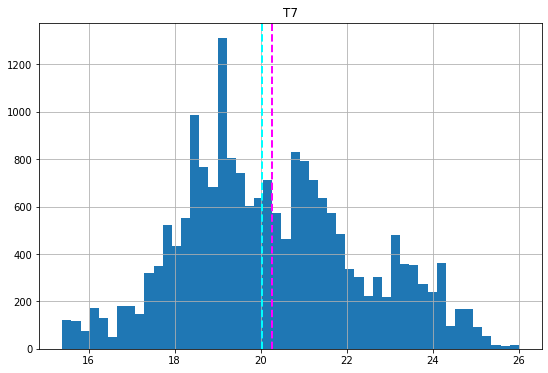

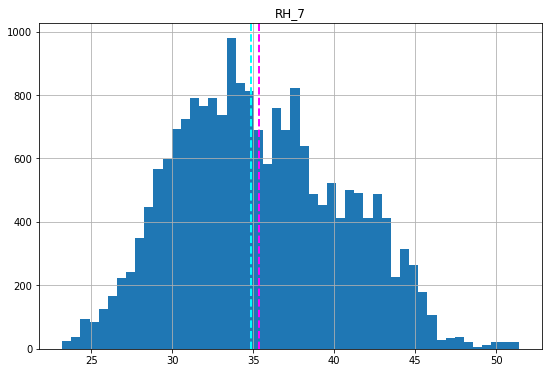

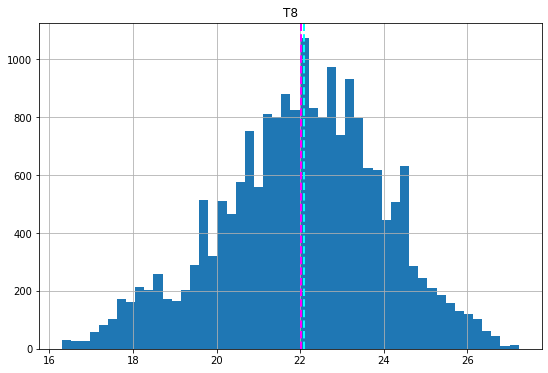

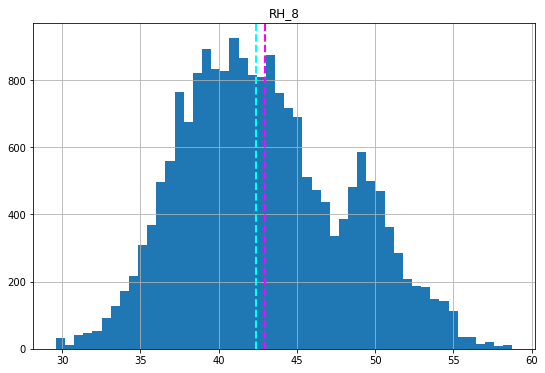

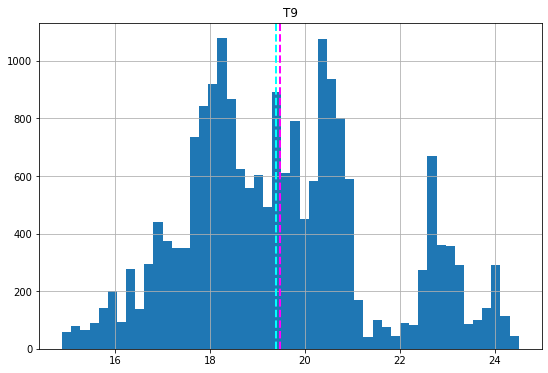

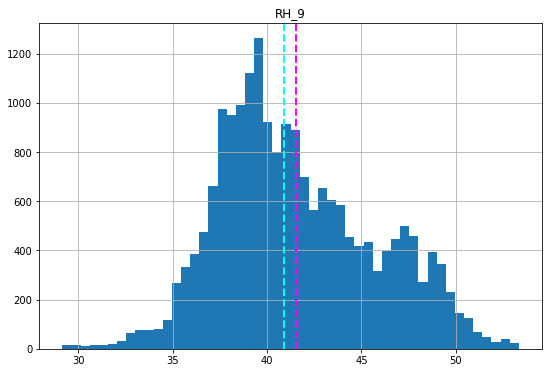

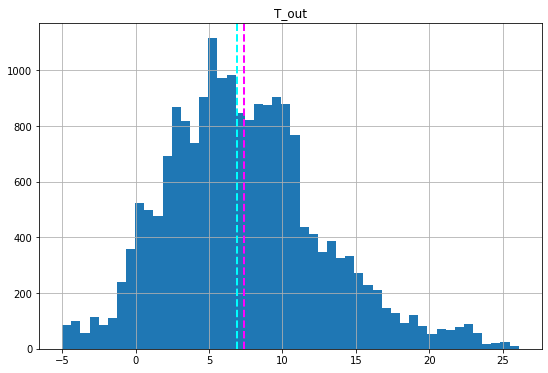

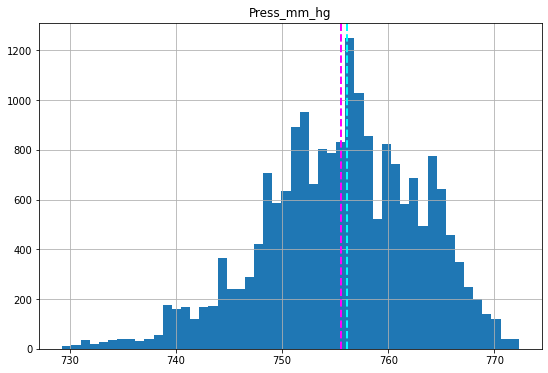

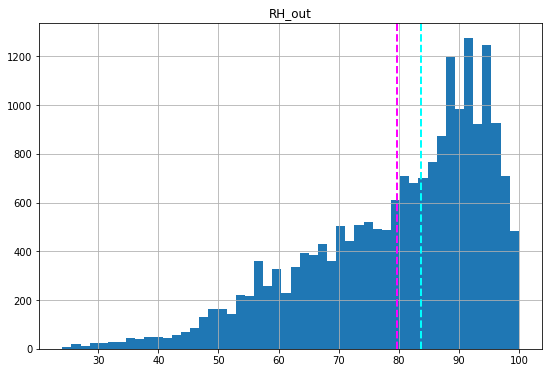

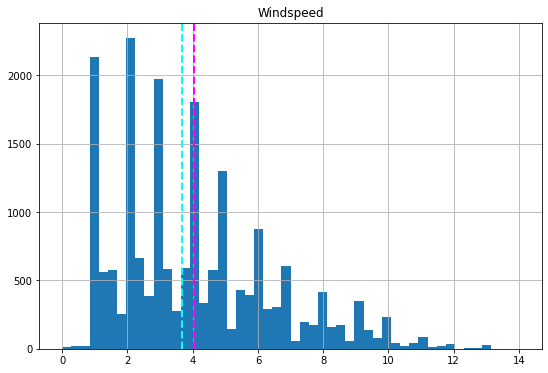

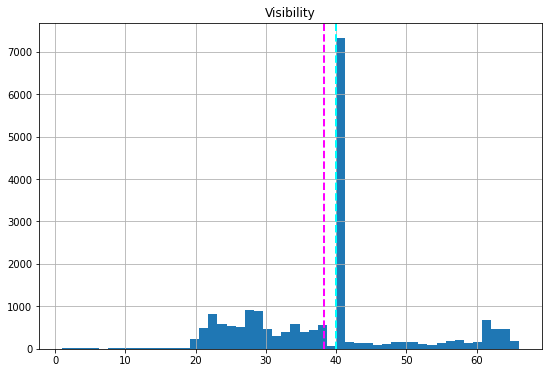

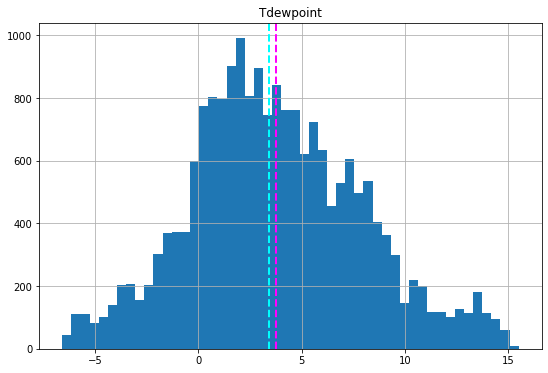

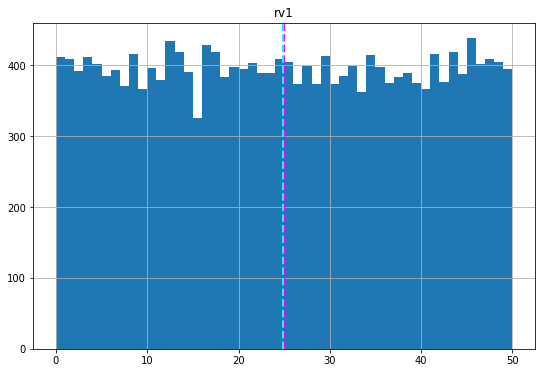

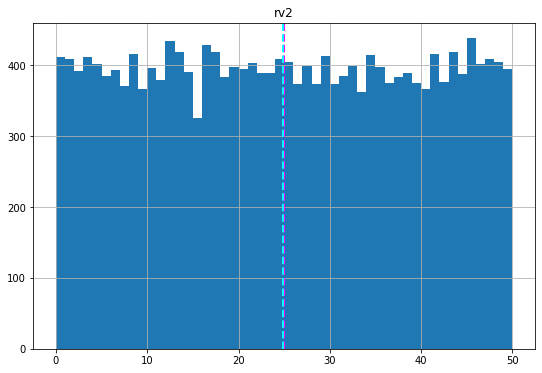

In [ ]:
# plot a bar plot for each NUMERICAL feature count 
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#Check relation between data

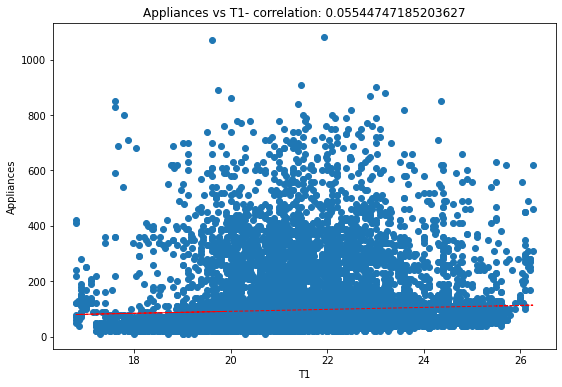

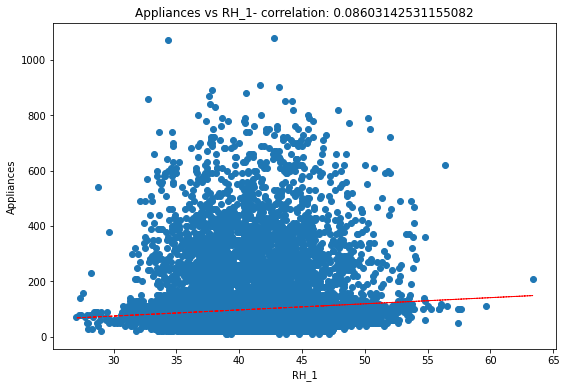

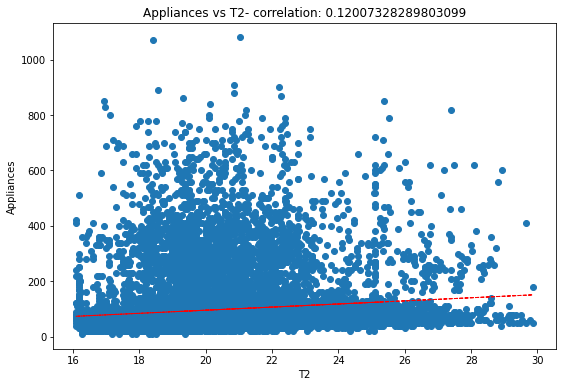

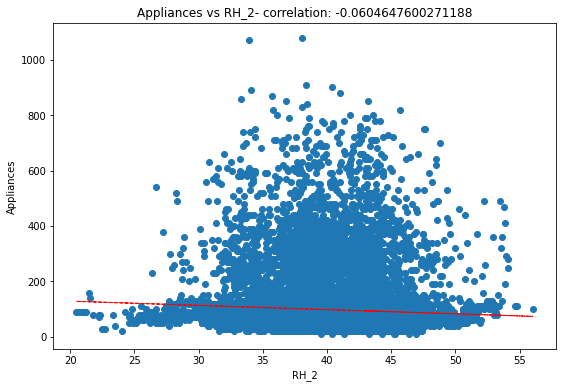

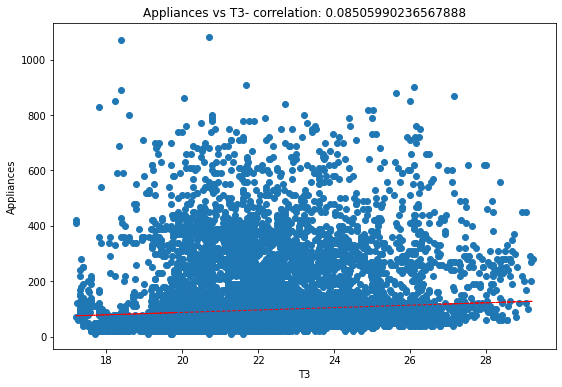

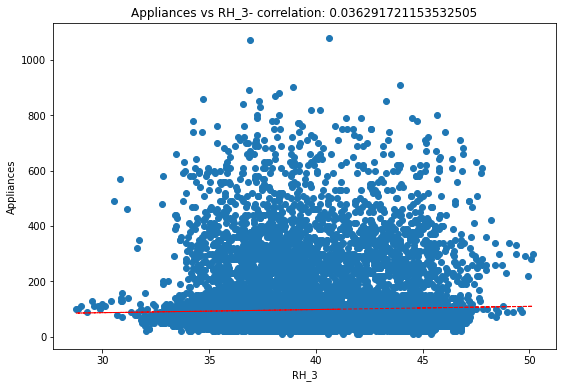

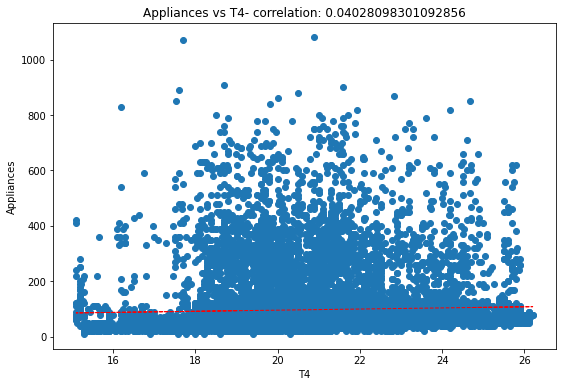

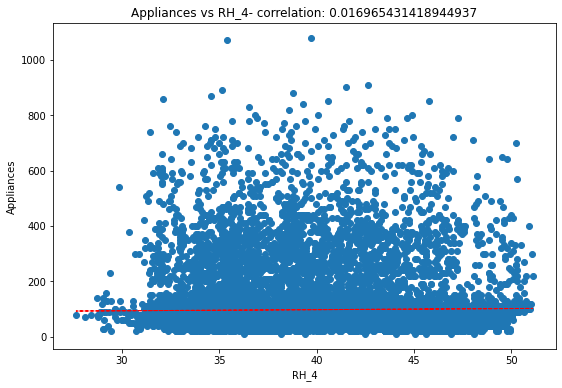

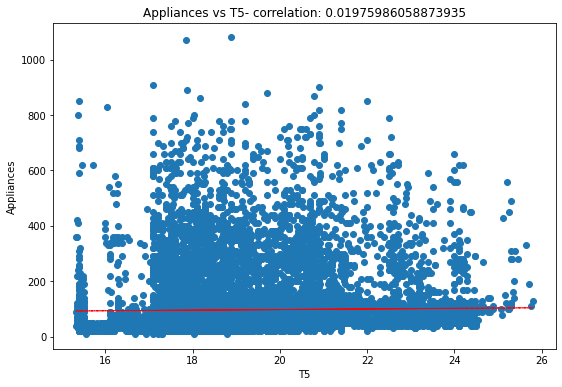

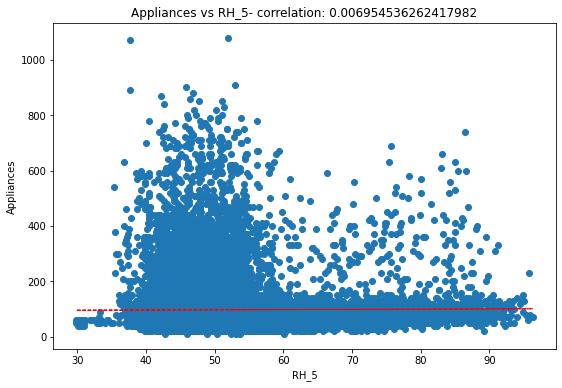

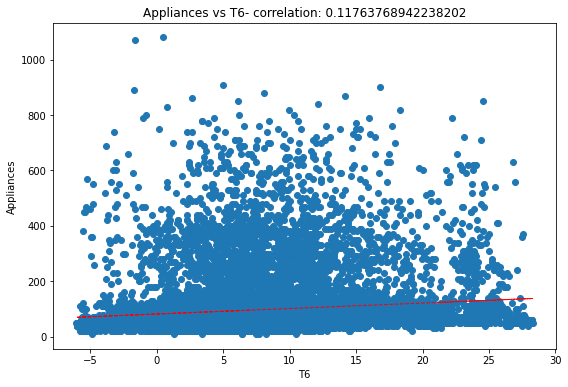

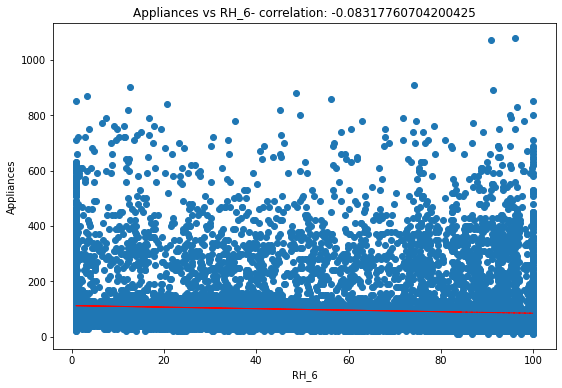

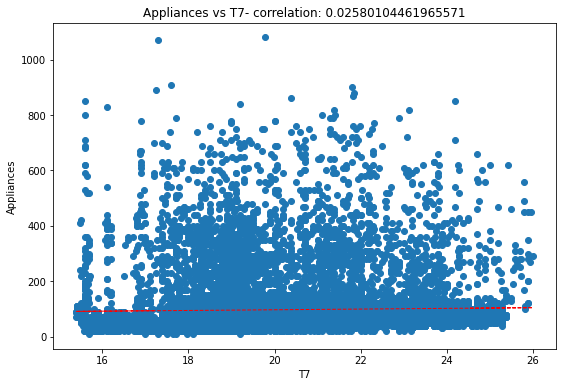

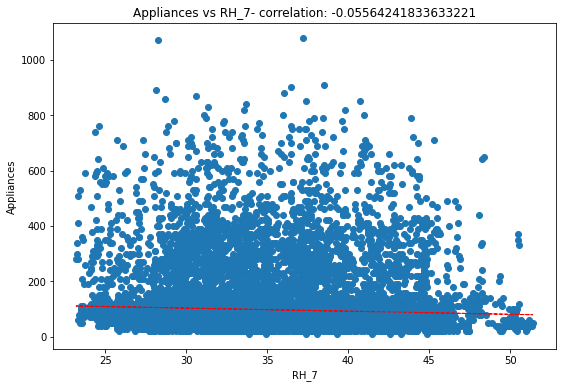

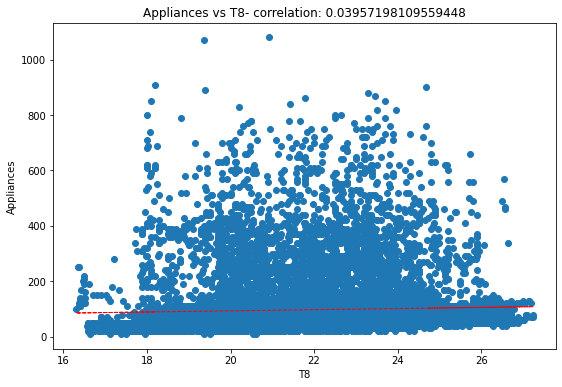

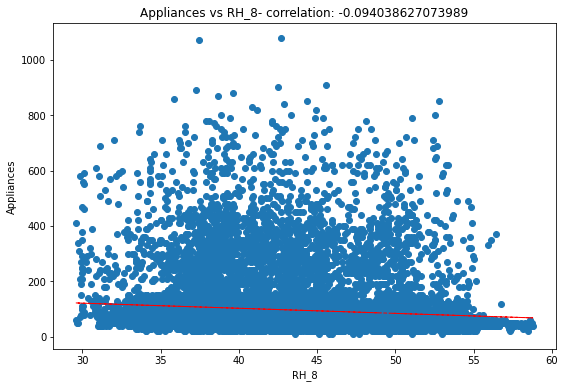

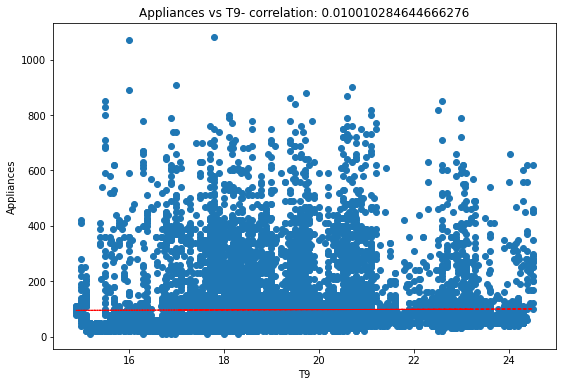

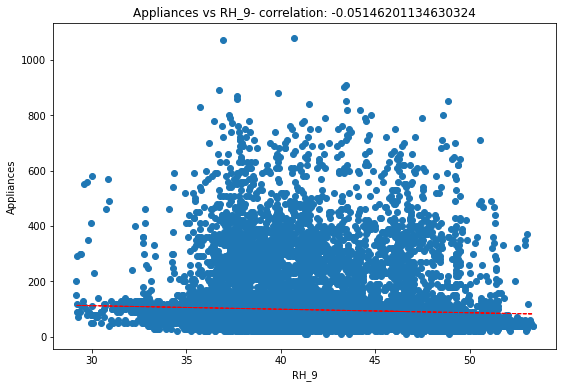

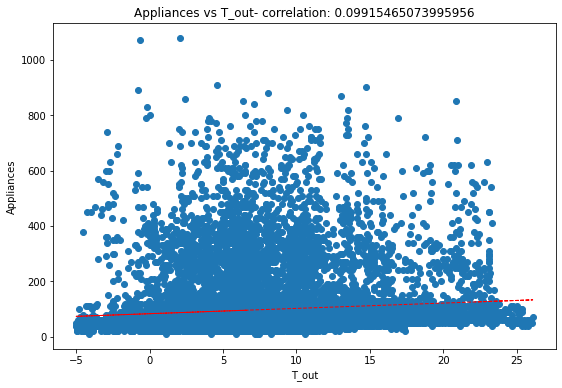

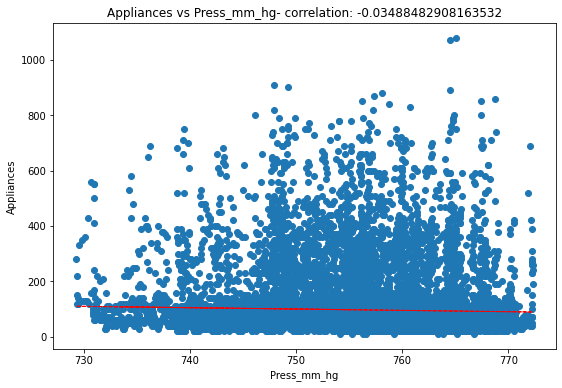

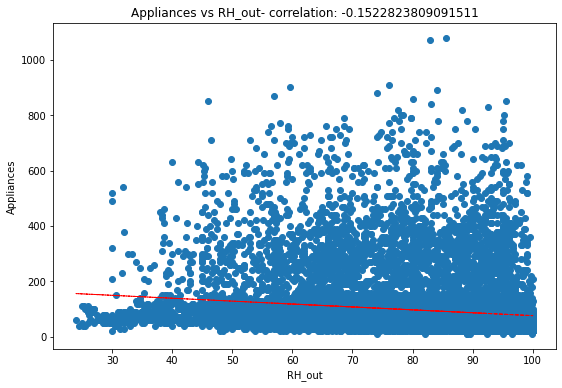

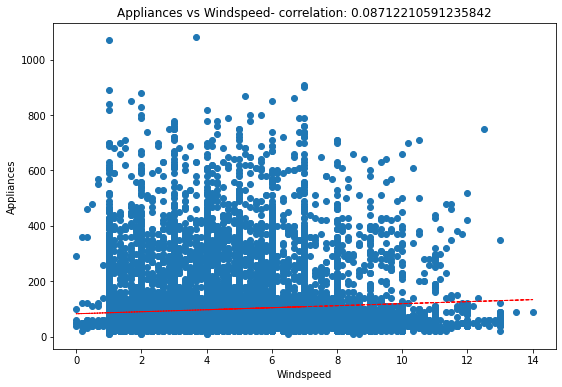

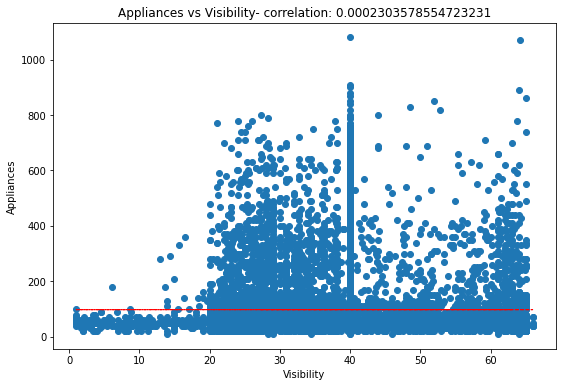

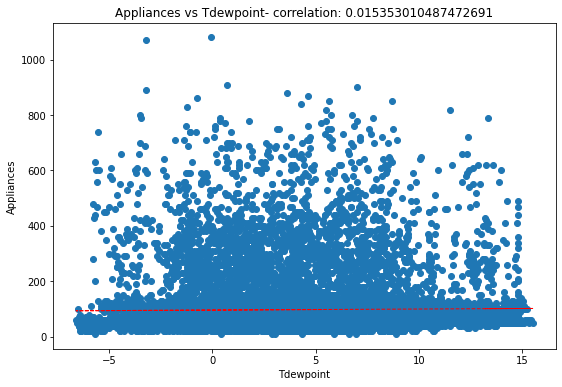

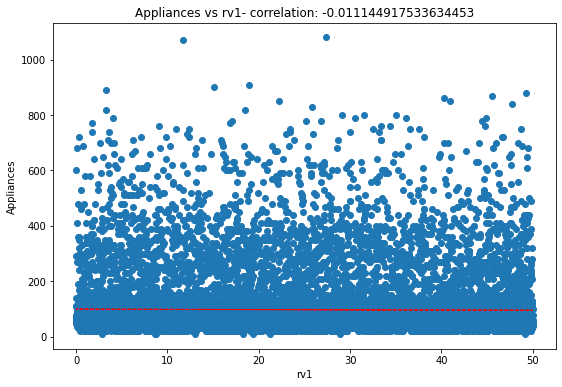

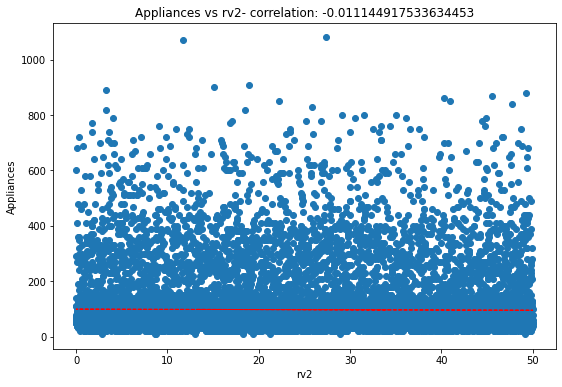

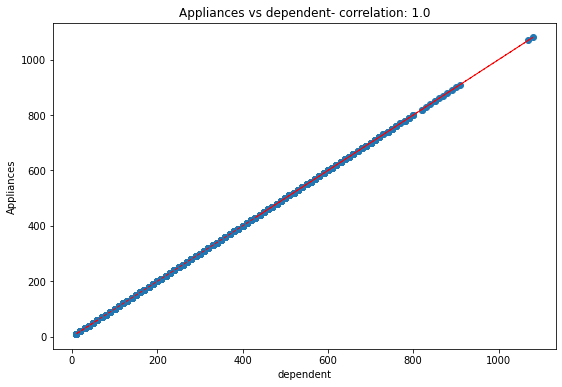

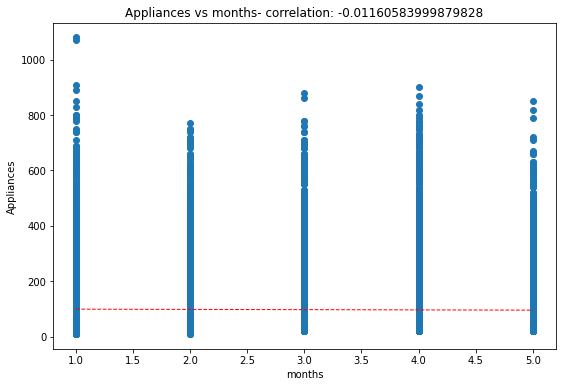

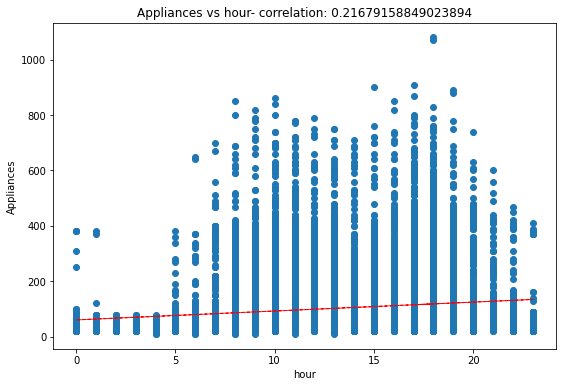

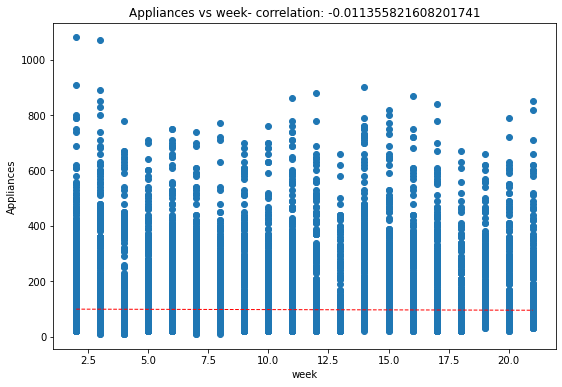

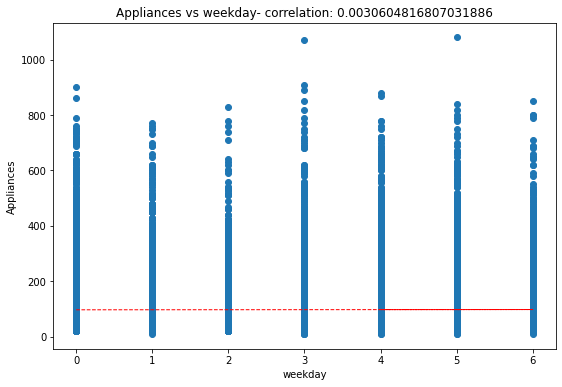

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy[col]
    label = energy['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energy[col], energy['Appliances'], 1)
    y_hat = np.poly1d(z)(energy[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

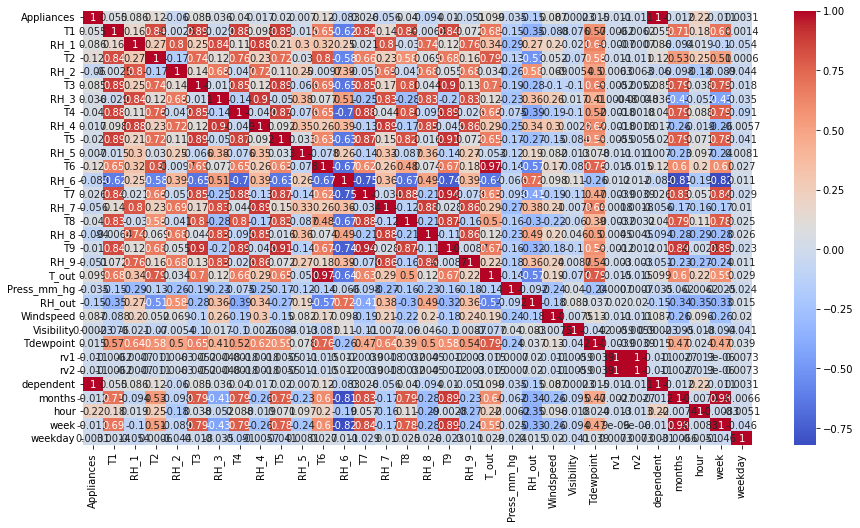

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = energy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
correlation.Appliances

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
dependent      1.000000
months        -0.011606
hour           0.216792
week          -0.011356
weekday        0.003060
Name: Appliances, dtype: float64

##Checking multicollear with vif method 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(energy[[i for i in energy.describe().columns if i not in ['Appliances']]])

,variables,VIF
0,T1,3706.020565
1,RH_1,1715.010360
2,T2,2524.826774
3,RH_2,2203.063584
4,T3,1375.684913
5,RH_3,1642.095032
6,T4,974.001567
7,RH_4,1426.253050
8,T5,1200.882670
9,RH_5,45.972509


In [ ]:
energy.Appliances.value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

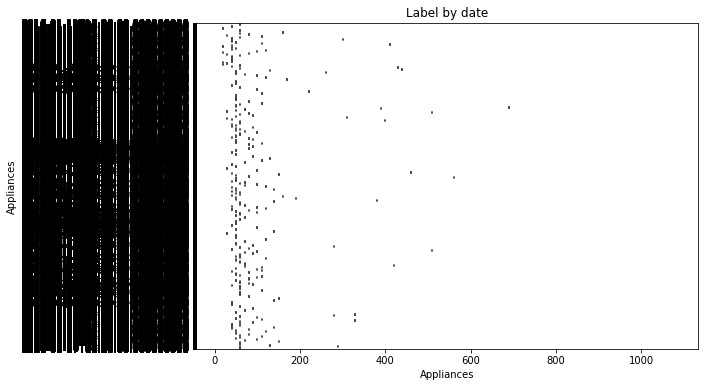

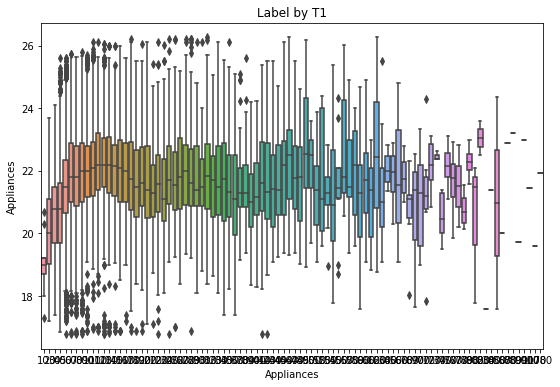

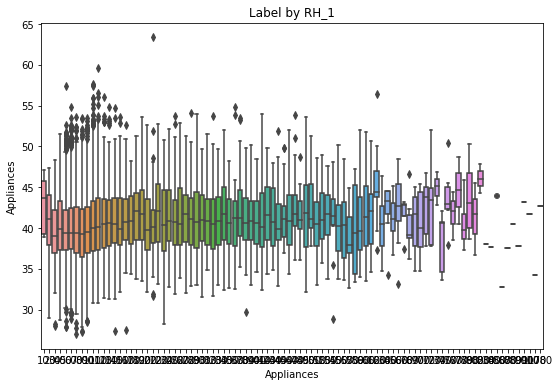

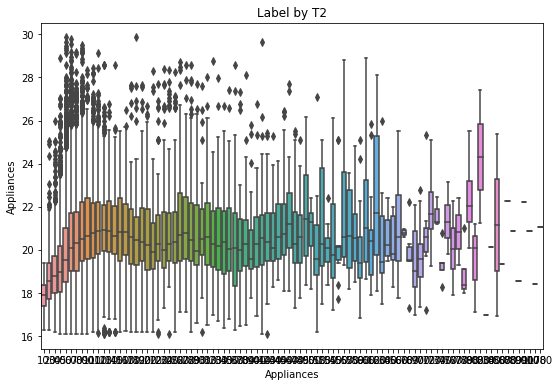

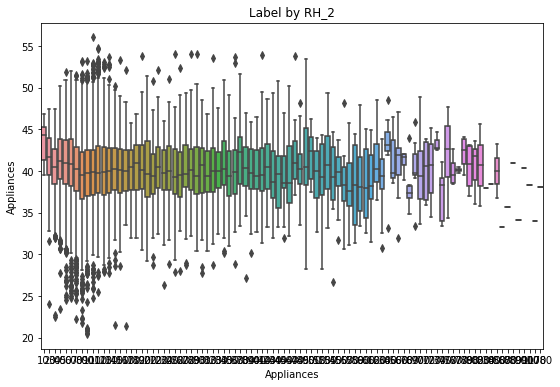

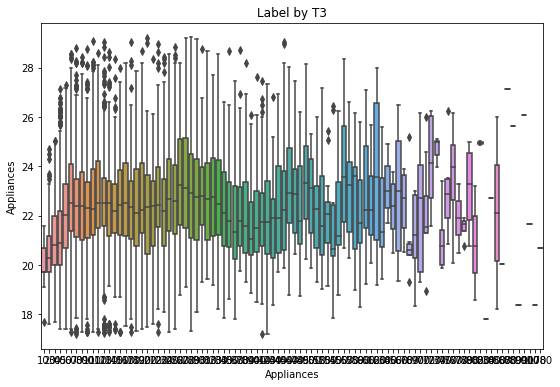

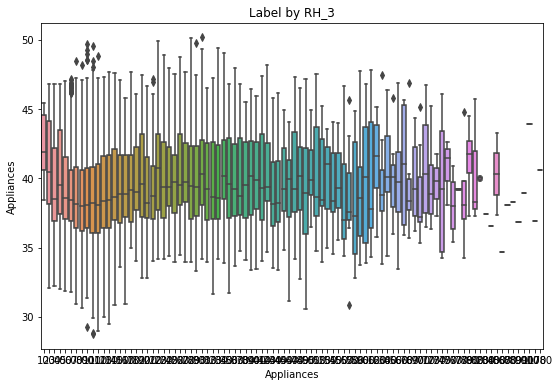

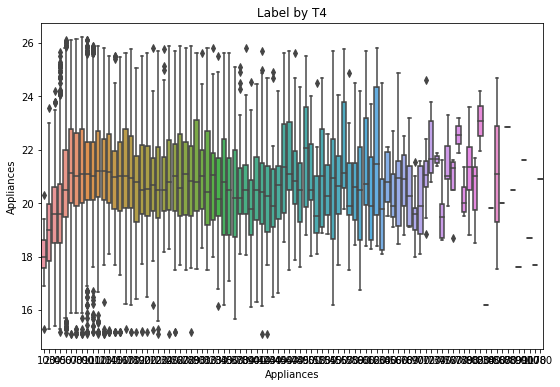

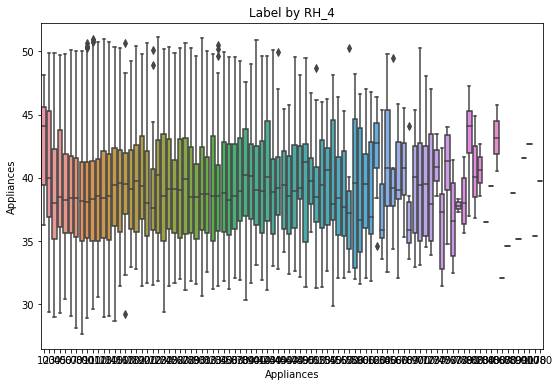

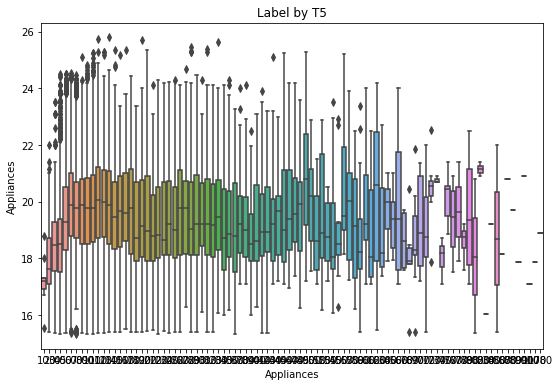

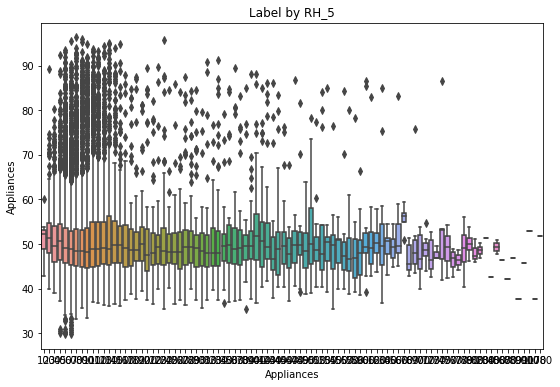

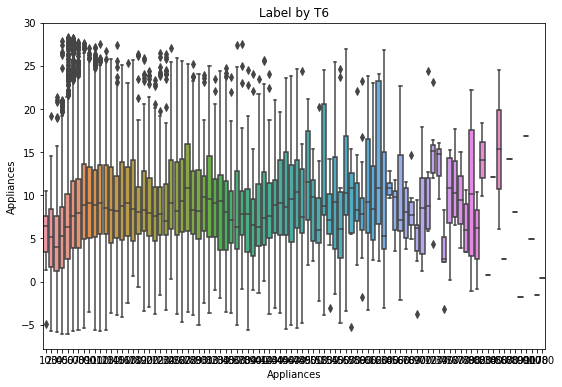

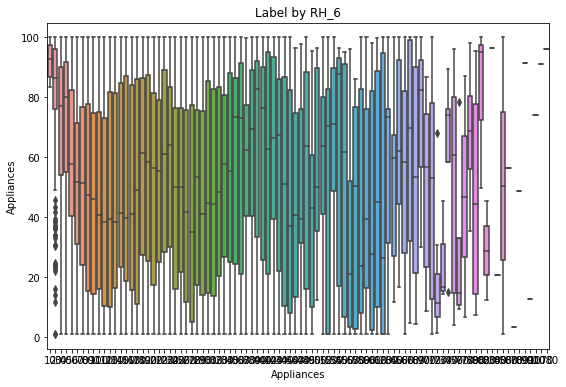

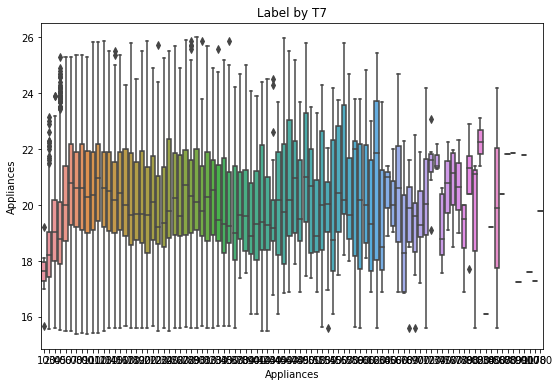

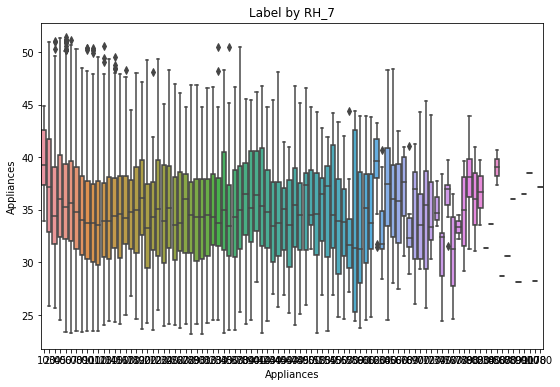

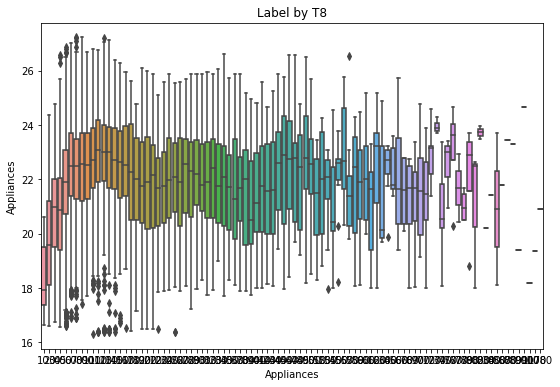

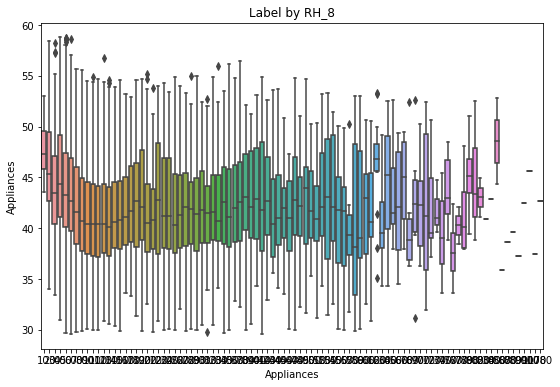

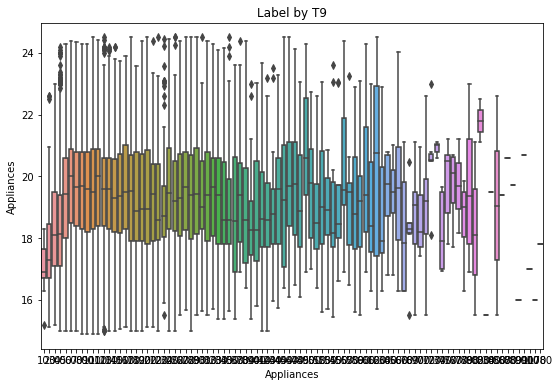

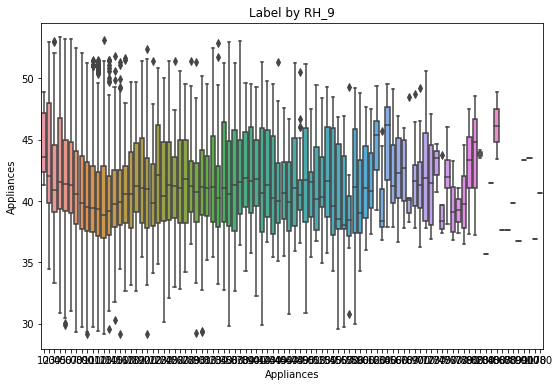

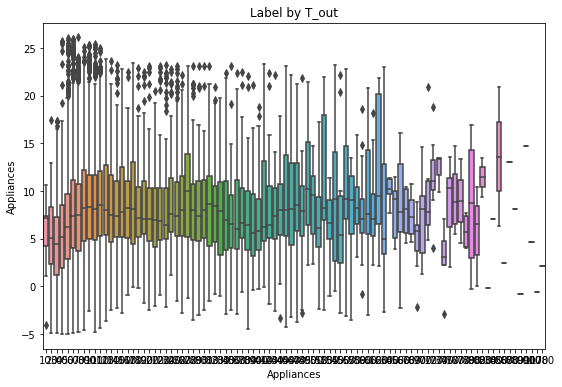

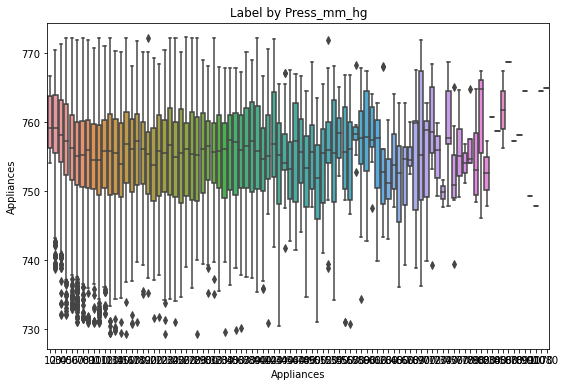

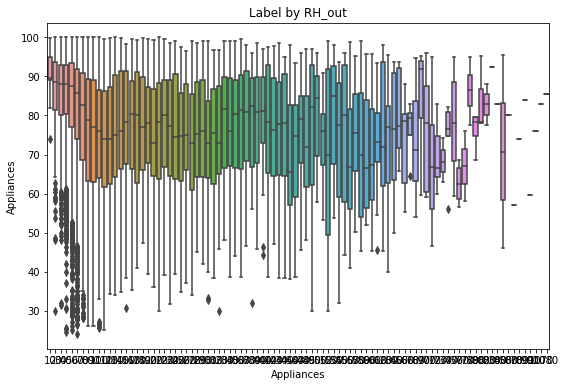

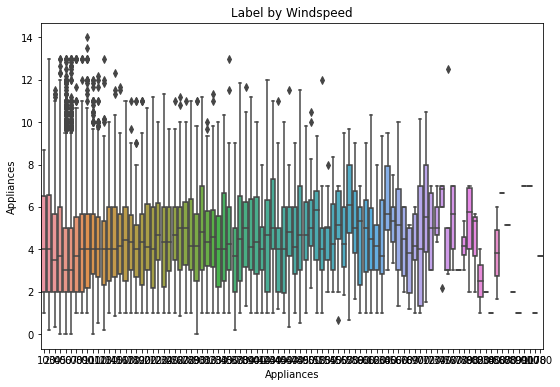

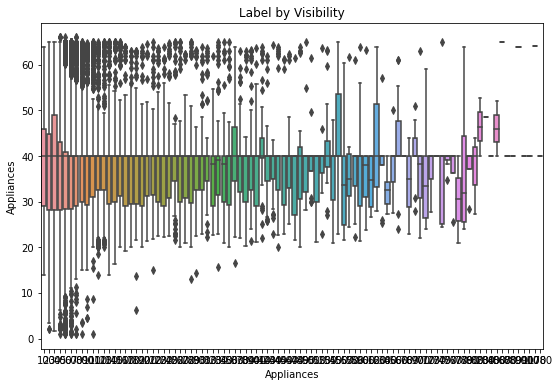

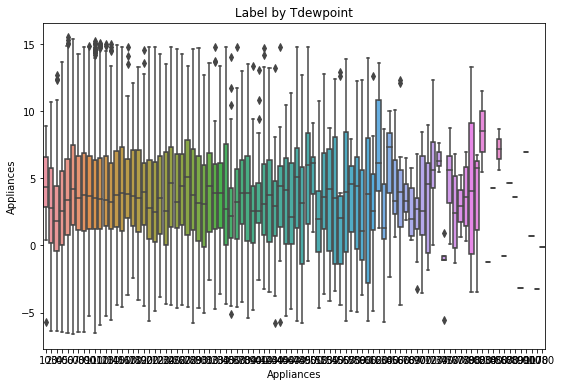

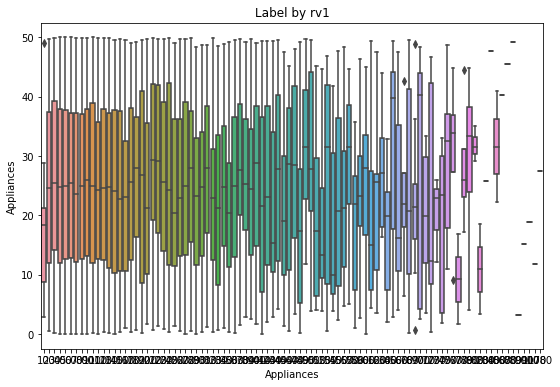

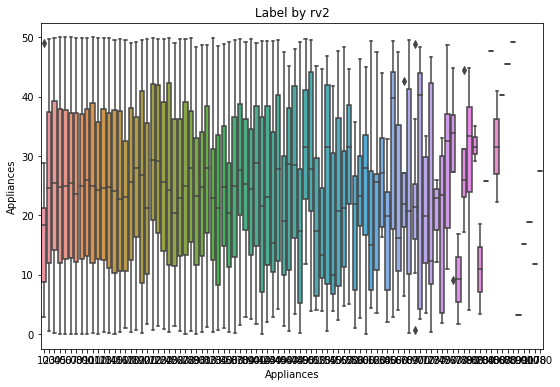

In [ ]:
#Checking Outliers
for col in energy.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(energy['Appliances'], energy[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()